In [1]:
#pip install spacy

In [2]:
import pandas as pd
import numpy as np
import nltk
#nltk.download("punkt")
#nltk.download("stopwords")
import string
import seaborn as sns
import matplotlib as plt

In [3]:
path = "DataSet/Airline-Sentiment-2-w-AA.csv"

In [4]:
df = pd.read_csv(path, encoding= 'unicode_escape')

In [5]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [27]:
import math
lat = []
for i in df["tweet_coord"]:
    try:
        if math.isnan(float(i)):
            print("NA")
    except:
        print(i.split(",")[0][1:])
        print(i.split(",")[1][1:-1])

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
40.74804263
-73.99295302
NA
NA
NA
NA
NA
NA
42.361016
-71.02000488
33.94540417
-118.4062472
NA
NA
33.94209449
-118.40410103
NA
33.2145038
-96.9321504
NA
NA
NA
NA
NA
NA
NA
34.0219817
-118.38591198
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
33.57963333
-117.73024772
NA
NA
NA
NA
NA
NA
40.6413712
-73.78311558
NA
NA
NA
NA
36.08457854
-115.13780136
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
0.0
0.0
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
0.0
0.0
NA
NA
0.0
0.0
0.0
0.0
37.79374402
-122.39327564
NA
NA
NA
NA
NA
NA
26.074379
-80.1416831
NA
NA
NA
NA
NA
NA
NA
NA
33.9469039
-118.40716847
NA
51.04345575
-114.06071363
NA
40.64662464
-73.77090177
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
33.94652852
-118.40766257
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
38.9128188
-77.00798226
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
32.84359605
-96.

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
34.99254864
-80.92841859
NA
37.61829369
-122.39192247
NA
NA
NA
NA
NA
NA
NA
21.32911863
-157.91749165
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
38.95801195
-77.44365722
NA
NA
NA
NA
NA
38.93770157
-77.4551004
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
37.61839686
-122.38751
NA
NA
NA
37.61926072
-122.38812564
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
38.95638224
-77.43898845
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
0.0
0.0
NA
NA
NA
35.07067492
-80.7899648
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
43.60417384
-110.7362561
NA
39.85760174
-104.66669625
NA
NA
NA
NA
NA
NA
26.07294988
-80.14147128
NA
NA
0.0
0.0
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
35.00096266
-80.87374938
NA
35.00595547
-80.89437239
NA
NA
NA
NA
NA
NA
NA
19.43010575
-99.18988829
NA
NA
NA
NA


NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
40.731704
-73.1724805
NA
NA
NA
41.93001697
-72.68496357
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
41.93015938
-72.68522399
NA
NA
NA
NA
NA
NA
33.93454129
-118.40270098
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
42.313473
-87.83530047
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
33.1973379
-96.7573509
NA
NA
NA
NA
NA
NA
26.08232307
-80.16234879
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
33.67698231
-117.8647932
33.18882771
-96.64036423
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
40.774588
-73.8708903
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
37.78915629
-122.4148408
NA
NA
NA
NA
NA
NA
NA
36.08029523
-115.1466466
35.0557688
-78.9702049
32.8405223
-96.8149248
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
32.80223908
-117.2312804
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
39.29345234
-94.71996208
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
36.0931536

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
29.99653598
-95.53874781
NA
NA
NA
NA
NA
NA
NA
NA
NA
35.22177192
-80.92309308
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
38.95804042
-77.26190063
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
39.87010428
-75.2507858
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
42.2822248
-71.0378408
NA
NA
NA
NA
NA
NA
NA
NA
33.43588637
-111.99965664
33.43824974
-111.99987573
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
N

-97.00367737
NA
NA
NA
NA
32.91792297
-97.00367737
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
42.01578804
-87.68332344
NA
NA
NA
32.89959729
-97.03558888
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
40.7786084
-73.94979947
41.98051682
-87.73798602
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
40.77382001
-73.87315003
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
39.8893997
-75.219676
NA
NA
NA
32.9176348
-97.0163282
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
41.99335821
-87.91260807
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
32.92215312
-96.97563515
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
47.6171292
-122.2803409
NA
NA
NA
NA
NA
NA
41.95627333
-87.87860345
NA
NA
41.45858699
-81.86780822
NA
NA
NA
NA
NA
NA
NA
NA
41.45856783
-81.86763782
NA
NA
NA
NA
NA
NA
NA
NA
NA
41.45862827
-81.86766456
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
25.79667815
-80.28050395
NA
NA
NA
NA
NA


Numero di attributi del dataset

In [16]:
len(df.columns)

20

In [12]:
df["_golden"].value_counts()

False    14600
True        40
Name: _golden, dtype: int64

In [13]:
df["_unit_state"].value_counts()

finalized      14583
golden            40
in progress       17
Name: _unit_state, dtype: int64

Numero di record del dataset ( = numero di Tweet)

In [17]:
len(df)

14640

Date di raccolta dei tweet

In [20]:
print(min(df["tweet_created"]))
print(max(df["tweet_created"]))

2/16/15 23:36
2/24/15 9:59


Numero di utenti dei tweet

In [21]:
len(df["name"].drop_duplicates())

7701

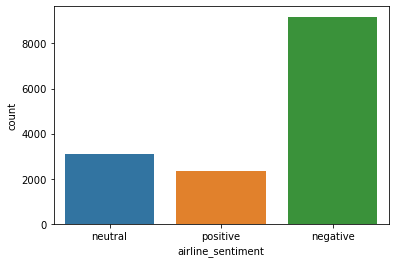

In [25]:
ax = sns.countplot(x="airline_sentiment", data=df)

In [39]:
for i in ["positive", "negative", "neutral"]:
    tmp = df[df["airline_sentiment"] == i]["_unit_id"].count()
    print("Number of " + i + " sentiment = " + str(tmp))
    print('\t\t' + "  Percertage = " + str(tmp/len(df) * 100))

Number of positive sentiment = 2363
		  Percertage = 16.140710382513664
Number of negative sentiment = 9178
		  Percertage = 62.69125683060109
Number of neutral sentiment = 3099
		  Percertage = 21.168032786885245


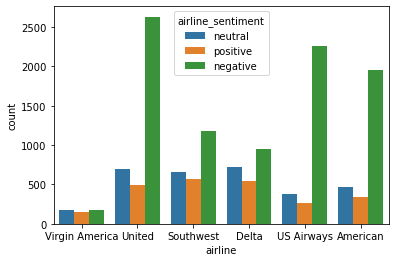

In [40]:
ax = sns.countplot(x="airline", hue="airline_sentiment", data=df)

In [50]:
companies = set(df["airline"].values)

In [51]:
companies

{'American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America'}

In [63]:
for i in companies:
    print("**** " + str(i) + " ****")
    tmp_df = df[df["airline"] == i]
    for j in ["positive", "negative", "neutral"]:
        
        tmp = tmp_df[tmp_df["airline_sentiment"] == j]["_unit_id"].count()
        print("\t Number of " + i + " sentiment = " + str(tmp))
        print('\t\t\t' + "    Percertage = " + str(tmp/len(df) * 100))
    print("\t Total Number of Tweets = " + str(len(tmp_df)))

**** Southwest ****
	 Number of Southwest sentiment = 570
			    Percertage = 3.8934426229508197
	 Number of Southwest sentiment = 1186
			    Percertage = 8.101092896174864
	 Number of Southwest sentiment = 664
			    Percertage = 4.53551912568306
	 Total Number of Tweets = 2420
**** American ****
	 Number of American sentiment = 336
			    Percertage = 2.2950819672131146
	 Number of American sentiment = 1960
			    Percertage = 13.387978142076504
	 Number of American sentiment = 463
			    Percertage = 3.162568306010929
	 Total Number of Tweets = 2759
**** US Airways ****
	 Number of US Airways sentiment = 269
			    Percertage = 1.8374316939890711
	 Number of US Airways sentiment = 2263
			    Percertage = 15.457650273224044
	 Number of US Airways sentiment = 381
			    Percertage = 2.6024590163934427
	 Total Number of Tweets = 2913
**** United ****
	 Number of United sentiment = 492
			    Percertage = 3.360655737704918
	 Number of United sentiment = 2633
			    Percertage = 17.984

Count delle ragione negative escludendo i casi di omissione della ragione

In [70]:
tmp_df = df[(df["airline_sentiment"] == "negative") & (df["negativereason"]!= "Can't Tell") & (df["negativereason"])]
negatives = set(tmp_df["negativereason"])
for i in negatives:
    n_negativ = tmp_df[tmp_df["negativereason"] == i]
    print("\t Number of <" + i + "> = " + str(len(n_negativ)))
    print('\t\t\t' + "    Percertage = " + str(len(n_negativ)/len(tmp_df) * 100))

	 Number of <Customer Service Issue> = 2910
			    Percertage = 36.429644466700054
	 Number of <Lost Luggage> = 724
			    Percertage = 9.063595393089635
	 Number of <Flight Booking Problems> = 529
			    Percertage = 6.622433650475713
	 Number of <Flight Attendant Complaints> = 481
			    Percertage = 6.021532298447672
	 Number of <Cancelled Flight> = 847
			    Percertage = 10.603405107661493
	 Number of <longlines> = 178
			    Percertage = 2.228342513770656
	 Number of <Bad Flight> = 580
			    Percertage = 7.260891337005508
	 Number of <Late Flight> = 1665
			    Percertage = 20.843765648472708
	 Number of <Damaged Luggage> = 74
			    Percertage = 0.9263895843765648


Numero di Tweet per ogni sentimento

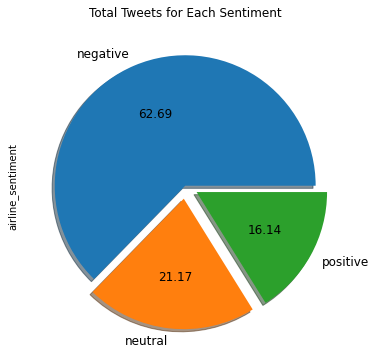

In [114]:
colors=sns.color_palette()
counts = df["airline_sentiment"].value_counts()
counts.plot(kind="pie",colors=colors,
    labels=["negative", "neutral", "positive"],explode=[0,0.1,0.1],
    shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Total Tweets for Each Sentiment")

Plot delle ragioni negative

Text(0, 0.5, 'No. of Tweets')

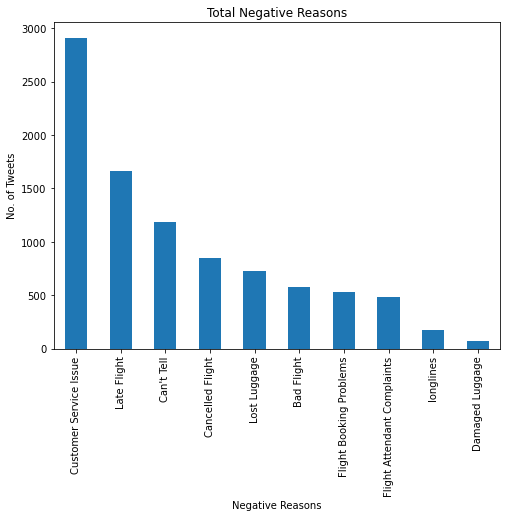

In [113]:
counts = df["negativereason"].value_counts()
counts.plot(kind = "bar",figsize=(8,6),title = "Total Negative Reasons")
plt.pyplot.xlabel('Negative Reasons', fontsize=10)
plt.pyplot.ylabel('No. of Tweets', fontsize=10)

Plottiamo le cinque ragioni negative più frequenti

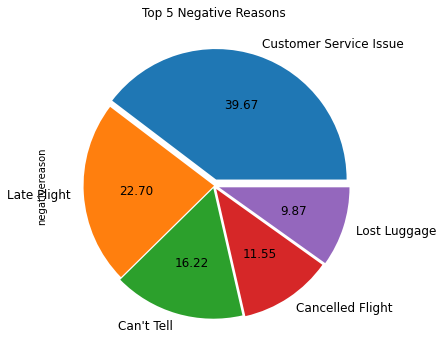

In [132]:
counts = df["negativereason"].value_counts()
counts[:5].plot(kind="pie",
            labels=counts.index.tolist()[:5], autopct='%.2f', explode=[0.05,0,0.02,0.03,0.04],
                fontsize=12, figsize=(6, 6), title="Top 5 Negative Reasons")

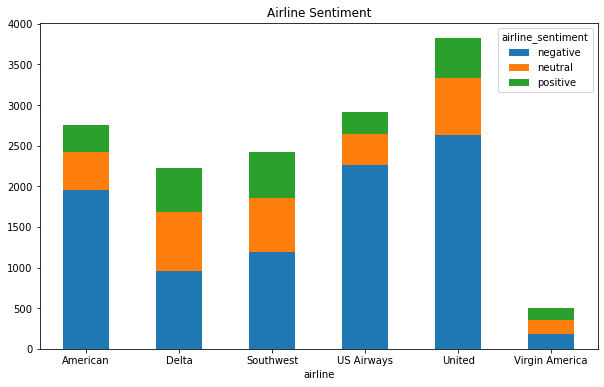

In [134]:
pd.crosstab(index = df["airline"],columns = df["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),rot=0,stacked=True,title="Airline Sentiment")

Numero di motivazioni negative non espresse

In [146]:
len(df[(df["airline_sentiment"]=="negative") & (df["negativereason"]=="Can't Tell")])/ len(df[(df["airline_sentiment"]=="negative")]) * 100

12.965787753323163